In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url=r'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Mall_Customers.csv'
url

'https://raw.githubusercontent.com/anantdivanji/LearnDigital-/main/4th%20Sem/Mall_Customers.csv'

In [4]:
data=pd.read_csv(url)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
data=pd.get_dummies(data,dtype='int',drop_first=True)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [18]:
X_train=data[['Annual Income (k$)','Spending Score (1-100)']]
X_train

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train)



KMeans(n_clusters=3, random_state=0)

In [26]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

In [29]:
kmeans.fit([[75,8]])

KeyError: "None of [Index([75, 8], dtype='int32')] are in the [columns]"

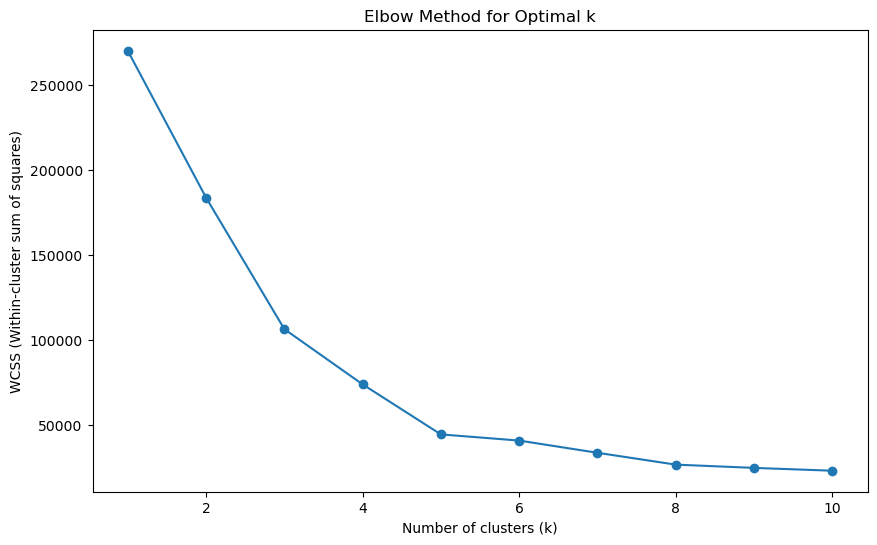

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\Users\RDP16\Downloads/Mall_Customers.csv'
data = pd.read_csv(file_path)

# Extracting features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow method to determine the optimal number of clusters
wcss = []  # List to store the within-cluster sum of squares for each k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()
